In [2]:
import torch
torch.cuda.is_available()

True

In [6]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Ti Laptop GPU'

In [7]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [8]:
original_df = pd.read_csv('df.csv')

In [9]:
df = original_df.copy()

# Unir con el de demograficas

In [10]:
demograficas = pd.read_csv('demograficas.csv')
demograficas

,customer_id,ingreso_promedio_300m,gasto_promedio_300m,flo_sem_0a14_300m,flo_sem_15a29_300m,flo_sem_30a44_300m,flo_sem_45a64_300m,flo_sem_65amas_300m,flo_finde_tot_300m
0,246911,17088.826123,11327.303204,1248.985012,2621.147201,1030.952985,758.388331,228.180550,4969.077288
1,114117,10913.493620,7346.385524,1800.271307,754.014491,820.597108,652.248911,324.768726,4011.353214
2,103269,17014.605570,11289.296354,461.489275,1072.559697,1120.072621,820.367844,486.959066,4255.495467
3,265404,35848.692270,22991.209914,392.395263,958.855871,1041.107174,833.142106,428.597000,3834.779376
4,210998,21088.432198,13903.368667,254.356838,1046.899435,958.858168,705.611485,212.982087,2497.554329
...,...,...,...,...,...,...,...,...,...
93317,294776,7700.640338,1726.342417,187.938094,2021.690116,2512.738873,1844.164284,228.308183,4717.259682
93318,221322,21742.531907,14109.059646,55.202007,533.849153,689.440158,483.598770,94.241788,2018.170190
93319,111284,15474.932777,10670.920630,203.718972,999.726381,1067.033093,757.323036,137.970545,3838.087412
93320,292387,21248.351954,13646.263749,581.664180,758.072367,739.790212,514.115157,121.037321,2573.609606


In [11]:
# Primero, corregimos el merge original que tiene un error de sintaxis
df2 = pd.merge(df, demograficas, on='customer_id')
df2

,customer_id,month,amount,churn_next_month,type,dt,año,mes,ingreso_promedio_300m,gasto_promedio_300m,flo_sem_0a14_300m,flo_sem_15a29_300m,flo_sem_30a44_300m,flo_sem_45a64_300m,flo_sem_65amas_300m,flo_finde_tot_300m
0,100003,202107,27.0764,0.0,Hogar con Venta,2021-07-31,2021,7,59366.355111,33016.982118,92.776861,406.673628,503.389052,367.131813,117.962437,1734.483165
1,100003,202110,33.8851,0.0,Hogar con Venta,2021-10-31,2021,10,59366.355111,33016.982118,92.776861,406.673628,503.389052,367.131813,117.962437,1734.483165
2,100003,202109,36.7030,0.0,Hogar con Venta,2021-09-30,2021,9,59366.355111,33016.982118,92.776861,406.673628,503.389052,367.131813,117.962437,1734.483165
3,100003,202202,3.1349,0.0,Hogar con Venta,2022-02-28,2022,2,59366.355111,33016.982118,92.776861,406.673628,503.389052,367.131813,117.962437,1734.483165
4,100003,202106,19.3025,0.0,Hogar con Venta,2021-06-30,2021,6,59366.355111,33016.982118,92.776861,406.673628,503.389052,367.131813,117.962437,1734.483165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800922,399999,202203,17.6118,0.0,Hogar con Venta,2022-03-31,2022,3,59764.115072,33360.195674,354.332639,460.004285,492.563008,446.692747,362.811227,2425.697534
2800923,399999,202004,111.3280,0.0,Hogar con Venta,2020-04-30,2020,4,59764.115072,33360.195674,354.332639,460.004285,492.563008,446.692747,362.811227,2425.697534
2800924,399999,202302,0.0000,0.0,Hogar con Venta,2023-02-28,2023,2,59764.115072,33360.195674,354.332639,460.004285,492.563008,446.692747,362.811227,2425.697534
2800925,399999,202310,0.0000,0.0,Hogar con Venta,2023-10-31,2023,10,59764.115072,33360.195674,354.332639,460.004285,492.563008,446.692747,362.811227,2425.697534


In [39]:
# guardamos el df2
df2.to_csv('df2.csv', index=False)

# Ahora si separamos por type

In [12]:
df2['type'].value_counts()

type
Abarrotes / Almacenes / Bodegas / Víveres        789220
Hogar con Venta                                  666623
Estanquillos / kioscos                           615285
Cerveza y Licores                                297565
Frutas y Verduras                                 96683
Farmacia Independiente                            66425
Carnicería / Pollería / Pescadería                58114
Tiendas de Alimentos Especializados Orgánicos     57891
Tortillería                                       50322
Minisuper / Minimarket                            47715
Panadería / Pastelería                            25740
Mayorista Abarrotero                              21011
TDC/Proximidad Independiente                       8333
Name: count, dtype: int64

In [15]:
df2['type'].unique()

array(['Hogar con Venta', 'Carnicería / Pollería / Pescadería',
       'Estanquillos / kioscos', 'Minisuper / Minimarket',
       'Abarrotes / Almacenes / Bodegas / Víveres', 'Cerveza y Licores',
       'Frutas y Verduras',
       'Tiendas de Alimentos Especializados Orgánicos', 'Tortillería',
       'Panadería / Pastelería', 'Mayorista Abarrotero',
       'Farmacia Independiente', 'TDC/Proximidad Independiente'],
      dtype=object)

In [120]:
abarrotes = df2[df2['type'] == 'Abarrotes / Almacenes / Bodegas / Víveres']
hogar = df2[df2['type'] == 'Hogar con Venta']
estanquillos = df2[df2['type'] == 'Estanquillos / kioscos']
cerveza = df2[df2['type'] == 'Cerveza y Licores']
frutas = df2[df2['type'] == 'Frutas y Verduras']
farmacia = df2[df2['type'] == 'Farmacia Independiente']
carniceria = df2[df2['type'] == 'Carnicería / Pollería / Pescadería']
organicos = df2[df2['type'] == 'Tiendas de Alimentos Especializados Orgánicos']
tortillera = df2[df2['type'] == 'Tortillería']
minisuper = df2[df2['type'] == 'Minisuper / Minimarket']
panaderia = df2[df2['type'] == 'Panadería / Pastelería']
mayorista = df2[df2['type'] == 'Mayorista Abarrotero']
tdc = df2[df2['type'] == 'TDC/Proximidad Independiente']

# Ahora si XGBoost

In [121]:
# Columna dt to datetime
frutas.drop(columns=['month', 'type', 'dt'], inplace=True)
frutas.set_index('customer_id', inplace=True)

C:\Users\jesus\AppData\Local\Temp\ipykernel_620\1181196814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frutas.drop(columns=['month', 'type', 'dt'], inplace=True)


In [122]:
frutas['churn_next_month'].value_counts()

churn_next_month
0.0    95107
1.0     1576
Name: count, dtype: int64

In [123]:
X, y = frutas.drop('churn_next_month', axis=1), frutas[['churn_next_month']]

In [124]:
y_encoded = OrdinalEncoder().fit_transform(y)

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to pd.Categorical
for col in cats:
   X[col] = X[col].astype('category')
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=8)

In [125]:
from sklearn.pipeline import Pipeline
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBClassifier

estimators = [
    ('encoder', TargetEncoder()),
    ('clf', XGBClassifier(random_state=8, device="cuda")) # can customize objective function with the objective parameter
]
pipe = Pipeline(steps=estimators)
pipe

Pipeline(steps=[('encoder', TargetEncoder()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device='cuda',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [126]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'clf__max_depth': Integer(2,8),
    'clf__learning_rate': Real(0.001, 1.0, prior='log-uniform'),
    'clf__subsample': Real(0.5, 1.0),
    'clf__colsample_bytree': Real(0.5, 1.0),
    'clf__colsample_bylevel': Real(0.5, 1.0),
    'clf__colsample_bynode' : Real(0.5, 1.0),
    'clf__reg_alpha': Real(0.0, 10.0),
    'clf__reg_lambda': Real(0.0, 10.0),
    'clf__gamma': Real(0.0, 10.0)
}

opt = BayesSearchCV(pipe, search_space, cv=5, n_iter=100, scoring='f1', random_state=8) 
# in reality, you may consider setting cv and n_iter to higher values

In [127]:
opt.fit(X_train, y_train)

c:\Users\jesus\anaconda3\envs\datathon2024\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:30:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('encoder', TargetEncoder()),
                                        ('clf',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device='cuda',
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       feature_types=None,
                                                       gamma=None,
                                                       grow_policy=None,
                                                       importance_type...
                             'clf__learning_rate': Real(low=0.001, high=1.0, prior='log-uniform', transform='normalize'),
                             'clf__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'clf__reg_alpha': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__reg_lambda': Real(low=0.0, high=10.0, prior='uniform', transform='normalize'),
                             'clf__subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')})

In [128]:
opt.best_estimator_

Pipeline(steps=[('encoder', TargetEncoder(cols=[])),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=0.5, colsample_bynode=1.0,
                               colsample_bytree=0.5, device='cuda',
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0.0, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=1.0,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=8, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=8, ...))])

In [129]:
opt.best_score_

0.204495227406641

In [130]:
opt.score(X_test, y_test)

0.16666666666666666

In [131]:
prediccions = opt.predict(X_test)

In [116]:
prediccions[6000]

0

In [117]:
y_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [132]:
np.unique(prediccions)

array([0, 1])

In [119]:
opt.predict_proba(X_test)

array([[9.9999624e-01, 3.7557959e-06],
       [1.0000000e+00, 5.1872388e-16],
       [9.9986178e-01, 1.3819701e-04],
       ...,
       [9.9995792e-01, 4.2064297e-05],
       [9.9998802e-01, 1.1972528e-05],
       [9.9997437e-01, 2.5621479e-05]], dtype=float32)

# Otro tuto

In [85]:
# Encode y to numeric
y_encoded = OrdinalEncoder().fit_transform(y)

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to pd.Categorical
for col in cats:
   X[col] = X[col].astype('category')

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, stratify=y_encoded)

In [86]:
# Create classification matrices
dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [87]:
params = {"objective": "multi:softprob", "tree_method": "hist", "device":"cuda", "num_class": 2}
n = 1000

results = xgb.cv(
   params, dtrain_clf,
   num_boost_round=n,
   nfold=5,
   metrics=["mlogloss", "auc", "merror"],
)

In [88]:
# Supported tree methods are `approx` and `hist`.
clf = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# X is the dataframe we created in previous snippet
clf.fit(X_train, y_train)
# Must use JSON/UBJSON for serialization, otherwise the information is lost.
clf.save_model("categorical-model.json")

array([0.31581524, 0.06434437, 0.05921463, 0.06356369, 0.06464952,
       0.06854101, 0.0729871 , 0.07795594, 0.07325473, 0.06958015,
       0.0700937 ], dtype=float32)

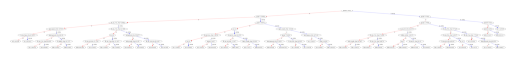

In [89]:
# Get a graph
graph = xgb.to_graphviz(clf, num_trees=1)
# Or get a matplotlib axis
ax = xgb.plot_tree(clf, num_trees=1)
# Get feature importances
clf.feature_importances_

In [90]:
results.keys()


Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')

In [91]:
# X is a dataframe we created in previous snippet
booster = xgb.train({"tree_method": "hist", "max_cat_to_onehot": 2, "device":"cuda"}, dtrain_clf)
# Must use JSON for serialization, otherwise the information is lost
booster.save_model("categorical-model.json")

In [92]:
SHAP = booster.predict(dtest_clf, pred_interactions=True)

# categorical features are listed as "c"
print(booster.feature_types)

['float', 'int', 'int', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float']


In [93]:
results['test-auc-mean'].max()

0.9214435456806749